### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read and overview check

In [2]:
df = pd.read_csv('./input_data/titanic/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Check dup and handle missing value

In [7]:
df[df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### Identify variable

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

* Output: `Survived`
* Input: 
    * 'PassengerId' --> Drop
    * 'Pclass' --> Category
    * 'Name' --> Text
    * 'Sex' --> Category
    * 'Age' --> Continuous
    * 'SibSp' --> Discreted
    * 'Parch' --> Discreted
    * 'Ticket' --> Text
    * 'Fare' --> Continuous
    * 'Cabin' --> Category
    * 'Embarked' --> Category

In [9]:
df.drop('PassengerId', axis=1, inplace=True)

In [10]:
df['Pclass'] = df['Pclass'].astype(str)

In [11]:
df_output = df[['Survived']]
df_input = df.drop('Survived', axis=1)

In [12]:
df_output.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [13]:
df_input.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df_input_category = df_input.select_dtypes(include='O')
df_input_category.head()

,Pclass,Name,Sex,Ticket,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,3,"Allen, Mr. William Henry",male,373450,NaN,S


In [15]:
df_input_numeric = df_input.select_dtypes(include='number')
df_input_numeric.head()

,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500


### Handle Missing Values

In [16]:
df_input_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Pclass    891 non-null    object
 1   Name      891 non-null    object
 2   Sex       891 non-null    object
 3   Ticket    891 non-null    object
 4   Cabin     204 non-null    object
 5   Embarked  889 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


* Cabin missing many values, drop
* Embarked miss 2 values, fill with mode

#### Drop columns missing value

In [17]:
df_input_category.drop('Cabin', axis=1, inplace=True)

#### General imputation

In [18]:
mode_em = df_input_category.Embarked.mode()[0]

In [19]:
miss_em = df_input_category[df_input_category.Embarked.isna()].index

In [20]:
df_input_category.loc[miss_em, 'Embarked'] = mode_em

In [21]:
df_input_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Pclass    891 non-null    object
 1   Name      891 non-null    object
 2   Sex       891 non-null    object
 3   Ticket    891 non-null    object
 4   Embarked  891 non-null    object
dtypes: object(5)
memory usage: 34.9+ KB


In [22]:
df_input_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     714 non-null    float64
 1   SibSp   891 non-null    int64  
 2   Parch   891 non-null    int64  
 3   Fare    891 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [23]:
df_temp = pd.concat([df_input_category, df_input_numeric], axis=1)
df_temp.head()

,Pclass,Name,Sex,Ticket,Embarked,Age,SibSp,Parch,Fare
0,3,"Braund, Mr. Owen Harris",male,A/5 21171,S,22.0,1,0,7.2500
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C,38.0,1,0,71.2833
2,3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S,26.0,0,0,7.9250
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S,35.0,1,0,53.1000
4,3,"Allen, Mr. William Henry",male,373450,S,35.0,0,0,8.0500


#### Similar case imputation

In [24]:
df_temp.groupby('Sex').median()

C:\Users\AW\AppData\Local\Temp\ipykernel_8128\1526573188.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_temp.groupby('Sex').median()


,Age,SibSp,Parch,Fare
Sex,,,,
female,27.0,0.0,0.0,23.0
male,29.0,0.0,0.0,10.5


In [25]:
median_M = df_temp.groupby('Sex').median().iloc[1, 0]
median_F = df_temp.groupby('Sex').median().iloc[0, 0]

C:\Users\AW\AppData\Local\Temp\ipykernel_8128\3747271581.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_M = df_temp.groupby('Sex').median().iloc[1, 0]
C:\Users\AW\AppData\Local\Temp\ipykernel_8128\3747271581.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_F = df_temp.groupby('Sex').median().iloc[0, 0]


In [26]:
miss_F_age = df_temp[df_temp.Age.isna() & (df_temp.Sex == 'female')].index
miss_M_age = df_temp[df_temp.Age.isna() & (df_temp.Sex == 'male')].index

In [27]:
df_input_numeric.loc[miss_F_age, 'Age'] = median_F
df_input_numeric.loc[miss_M_age, 'Age'] = median_M

In [28]:
df_input_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     891 non-null    float64
 1   SibSp   891 non-null    int64  
 2   Parch   891 non-null    int64  
 3   Fare    891 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


### Univarate analysis

#### Category analysis

In [29]:
df_input_category.columns

Index(['Pclass', 'Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

In [30]:
df_input_category.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

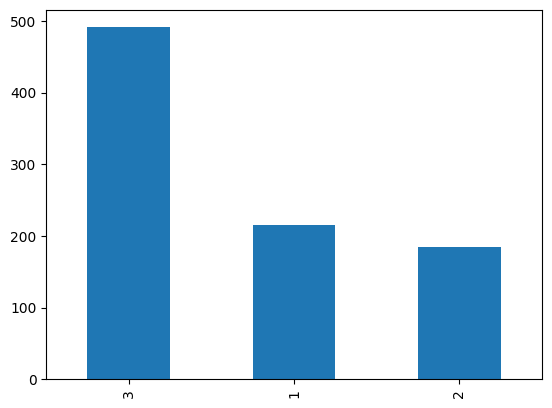

In [31]:
df_input_category.Pclass.value_counts().plot.bar()
plt.show()

#### Numeric analysis

In [32]:
df_input_numeric.columns

Index(['Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [33]:
_min = df_input_numeric.Age.min()
_max =df_input_numeric.Age.max()
median = df_input_numeric.Age.median()
mean = df_input_numeric.Age.mean()
var = df_input_numeric.Age.var()
std = df_input_numeric.Age.std()
kurt = df_input_numeric.Age.kurtosis()
skew = df_input_numeric.Age.skew()
print(f'min: {_min}, max: {_max}, median: {median}, mean: {round(mean,3)}')

min: 0.42, max: 80.0, median: 29.0, mean: 29.441


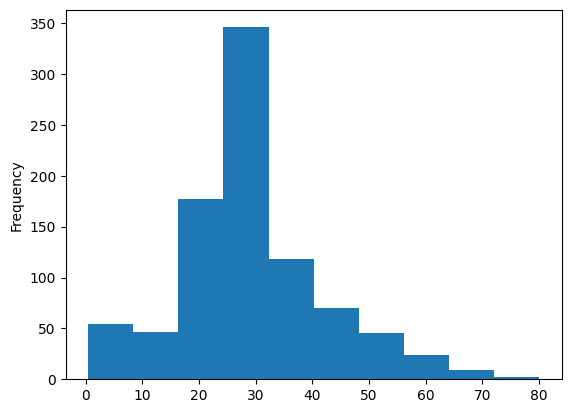

In [34]:
df_input_numeric.Age.plot.hist()
plt.show()

#### Output Analysis

In [35]:
df_output.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

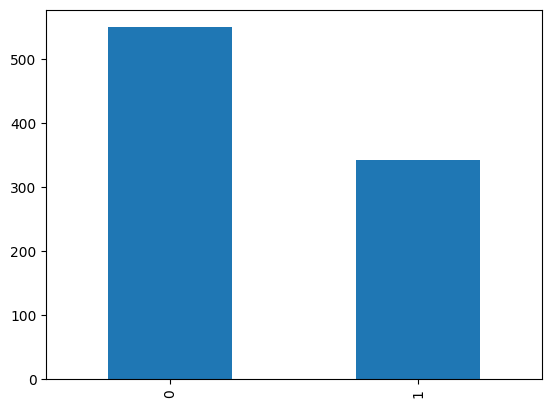

In [36]:
df_output.Survived.value_counts().plot.bar()
plt.show()

### Bivariate

#### Numeric vs Numeric

In [37]:
df_input_numeric.corr()

,Age,SibSp,Parch,Fare
Age,1.000000,-0.236376,-0.176038,0.094161
SibSp,-0.236376,1.000000,0.414838,0.159651
Parch,-0.176038,0.414838,1.000000,0.216225
Fare,0.094161,0.159651,0.216225,1.000000


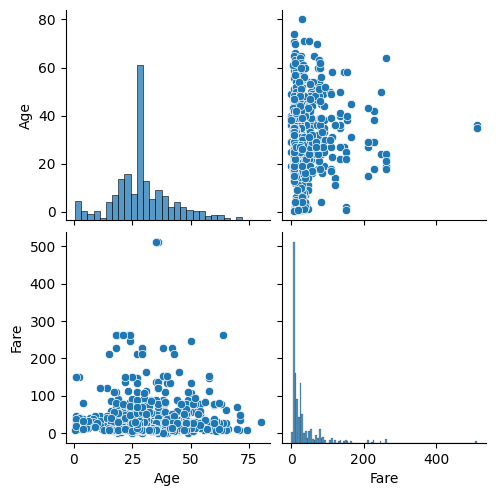

In [38]:
sns.pairplot(df_input_numeric[['Age','Fare']])
plt.show()

#### Category vs Category

In [39]:
tw_table = pd.crosstab(df_input_category['Pclass'], df_input_category['Sex'])
tw_table

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


<AxesSubplot: xlabel='Pclass'>

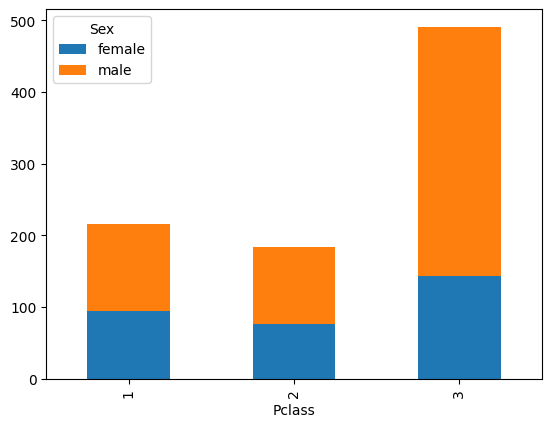

In [41]:
tw_table.plot.bar(stacked =True)

In [42]:
from scipy.stats import chi2, chi2_contingency

In [43]:
stat, p , dof, _ = chi2_contingency(tw_table)
print(stat, p)

16.971499095517114 0.00020638864348233114


H0 --> 2 biến độc lập

In [45]:
prob = 0.95
alpha = 1 - prob

In [46]:
if  p <= alpha:
    print('Reject H0 --> Dependent')
else:
    print('Fail to Reject H0 --> Independent')


Reject H0 --> Dependent


#### Category vs Numeric

In [48]:
df_temp = pd.concat([df_input_category, df_input_numeric], axis=1)
df_temp.head()

,Pclass,Name,Sex,Ticket,Embarked,Age,SibSp,Parch,Fare
0,3,"Braund, Mr. Owen Harris",male,A/5 21171,S,22.0,1,0,7.2500
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C,38.0,1,0,71.2833
2,3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S,26.0,0,0,7.9250
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S,35.0,1,0,53.1000
4,3,"Allen, Mr. William Henry",male,373450,S,35.0,0,0,8.0500


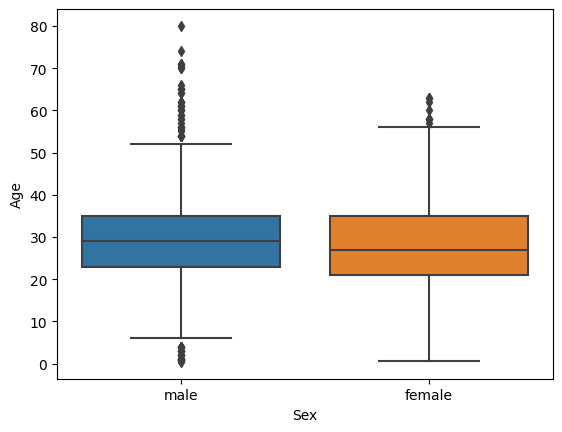

In [49]:
sns.boxplot(data=df_temp, x='Sex', y='Age')
plt.show()

In [52]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [51]:
formular = 'Fare ~ C(Sex) + C(Embarked) + C(Pclass) + C(Sex):C(Embarked)'

In [54]:
model = ols(formular, df_temp).fit()


In [55]:
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Sex),2.933973e+04,1.0,18.975940,1.479096e-05
C(Embarked),1.997242e+04,2.0,6.458742,1.641812e-03
C(Pclass),5.872527e+05,2.0,189.907543,2.512730e-69
C(Sex):C(Embarked),4.793650e+03,2.0,1.550185,2.127856e-01
Residual,1.365254e+06,883.0,NaN,NaN


In [56]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [57]:
for sub_category, df_group in df_temp.groupby('Sex'):
    result = pairwise_tukeyhsd(df_group['Fare'], df_group['Pclass'])
    print(f'Sub category: {sub_category} have result {result}')

Sub category: female have result   Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     1      2 -84.1557    0.0  -99.3115 -68.9999   True
     1      3  -90.007    0.0 -103.0347 -76.9793   True
     2      3  -5.8513 0.5842  -19.7812   8.0786  False
-------------------------------------------------------
Sub category: male have result  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     1      2 -47.4843    0.0 -59.0652 -35.9035   True
     1      3 -54.5645    0.0 -63.7904 -45.3386   True
     2      3  -7.0801 0.1976 -16.7384   2.5781  False
------------------------------------------------------
